In [ ]:
import torch
import torchtext
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

device= torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device availble for runing:")
print(device)

Device availble for runing:
cpu


In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk("/content/drive/MyDrive/TESS_Dataset"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/drive/MyDrive/TESS_Dataset/YAF_neutral/YAF_bar_neutral.wav',
 '/content/drive/MyDrive/TESS_Dataset/YAF_neutral/YAF_base_neutral.wav',
 '/content/drive/MyDrive/TESS_Dataset/YAF_neutral/YAF_boat_neutral.wav',
 '/content/drive/MyDrive/TESS_Dataset/YAF_neutral/YAF_bone_neutral.wav',
 '/content/drive/MyDrive/TESS_Dataset/YAF_neutral/YAF_back_neutral.wav']

In [ ]:
paths[2:6]

['/content/drive/MyDrive/TESS_Dataset/YAF_neutral/YAF_boat_neutral.wav',
 '/content/drive/MyDrive/TESS_Dataset/YAF_neutral/YAF_bone_neutral.wav',
 '/content/drive/MyDrive/TESS_Dataset/YAF_neutral/YAF_back_neutral.wav',
 '/content/drive/MyDrive/TESS_Dataset/YAF_neutral/YAF_bean_neutral.wav']

In [ ]:
labels[2:6]

['neutral', 'neutral', 'neutral', 'neutral']

In [ ]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

Data Frame


In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
1,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
2,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
3,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral
4,/content/drive/MyDrive/TESS_Dataset/YAF_neutra...,neutral


In [ ]:
df['label'].value_counts()

neutral    400
angry      400
ps         400
sad        400
happy      400
disgust    400
fear       400
Name: label, dtype: int64

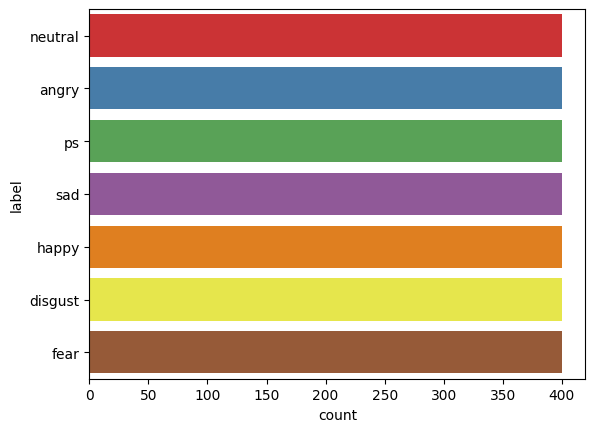

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'label' column
sns.countplot(data=df, y='label', palette='Set1')
plt.show()

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

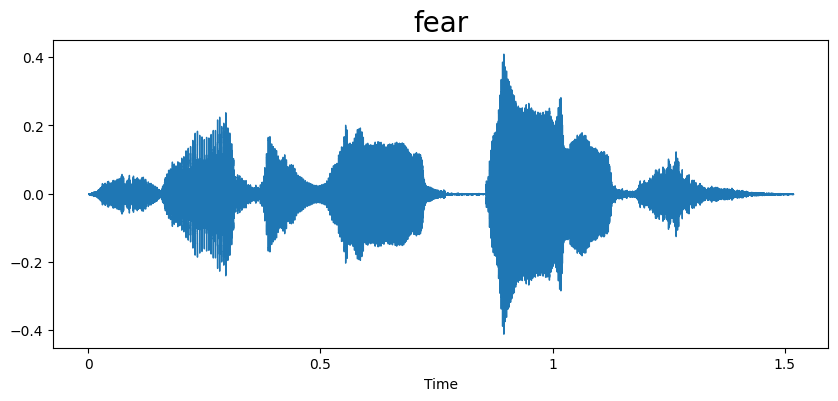

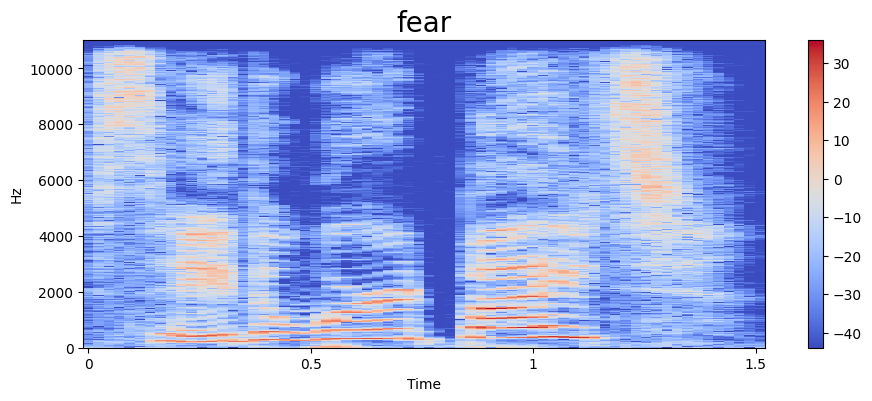

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

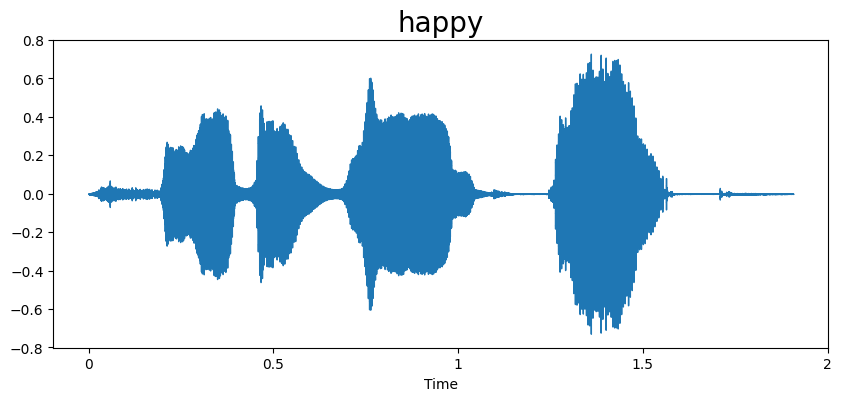

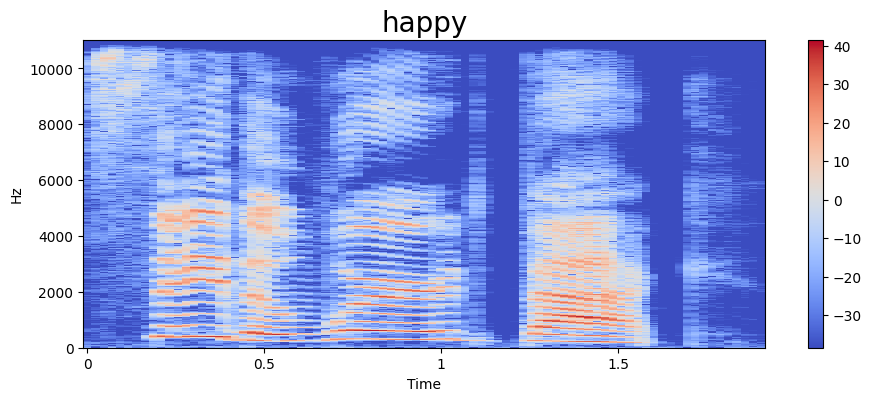

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

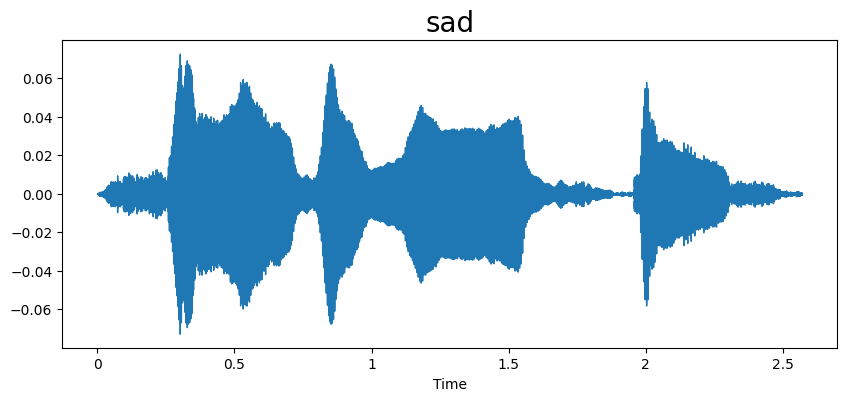

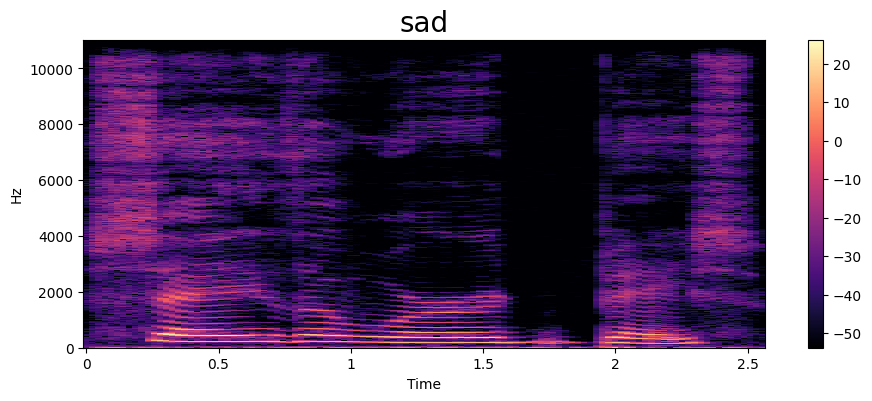

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


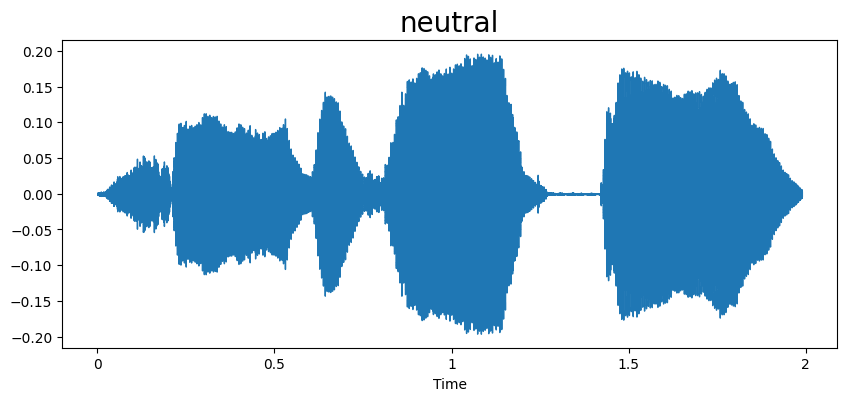

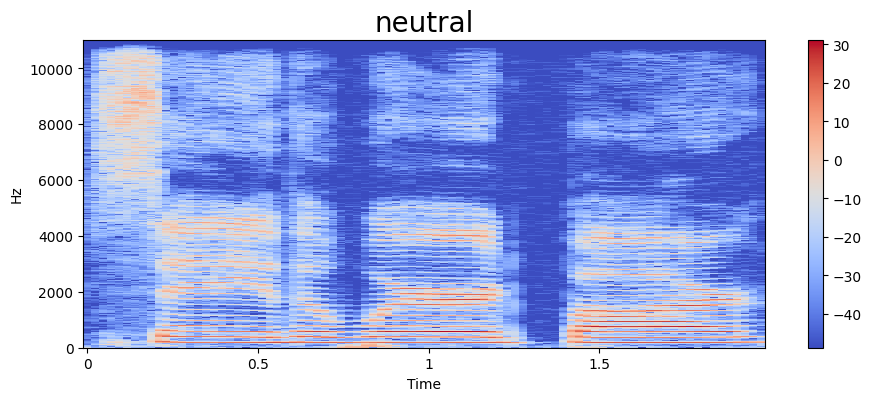

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

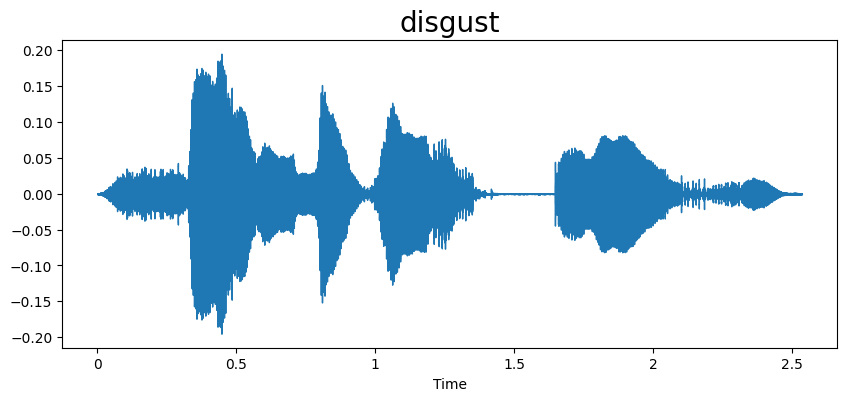

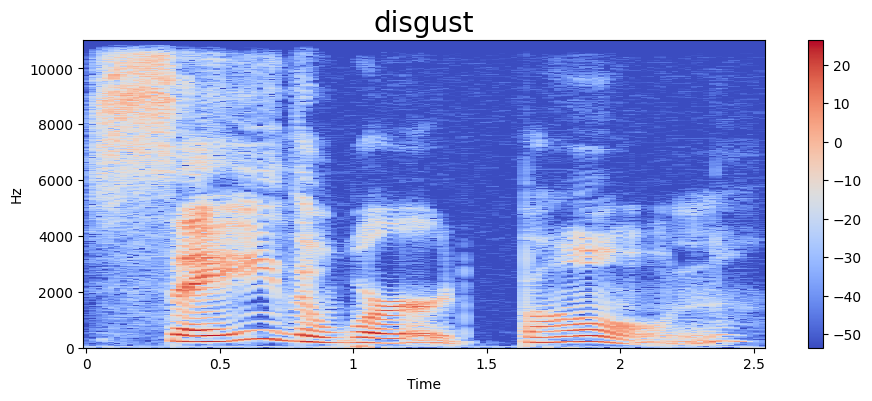

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.71432190e+02,  1.07306229e+02, -2.36984730e+01,  1.29541645e+01,
       -1.64787817e+00, -5.31965399e+00,  7.25560284e+00, -3.12852287e+01,
        6.16591072e+00,  9.43330574e+00, -1.84060764e+01,  1.65350666e+01,
       -1.09875507e+01,  2.52599597e+00, -2.19967079e+00, -3.78029990e+00,
       -3.65167689e+00, -1.45000136e+00, -6.42434931e+00, -8.04687405e+00,
        3.12314779e-01, -6.48154879e+00, -7.25023174e+00, -6.22210324e-01,
       -5.79320240e+00, -5.44561434e+00, -1.85092282e+00, -3.33492088e+00,
       -6.25694132e+00, -4.35016346e+00, -1.70824757e+01, -3.15619016e+00,
       -8.69360828e+00,  1.08489494e+01,  2.35143948e+01,  3.96305580e+01,
        3.89764061e+01,  3.00114079e+01,  9.17850780e+00, -1.97209525e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-371.4322, 107.30623, -23.698473, 12.9541645,...
1       [-394.82037, 52.27196, -0.23424326, 31.694345,...
2       [-493.06287, 98.67417, 20.97822, 21.976233, 3....
3       [-409.94513, 105.649796, -4.5642543, 20.286285...
4       [-393.81622, 91.65329, -18.69992, 12.519554, 4...
                              ...                        
2795    [-464.8119, 70.25582, 10.510636, -12.559635, -...
2796    [-437.882, 86.159096, -5.2926884, -23.754158, ...
2797    [-431.9688, 65.27249, -0.07333605, -14.369298,...
2798    [-413.2932, 81.26914, -5.3418655, -12.67008, -...
2799    [-428.4035, 65.69212, 5.564823, -1.1533774, 2....
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 9s 158ms/step - loss: 1.0986 - accuracy: 0.5629 - val_loss: 3.6960 - val_accuracy: 0.3607
Epoch 2/50
35/35 [==============================] - 6s 162ms/step - loss: 0.2977 - accuracy: 0.8915 - val_loss: 3.4056 - val_accuracy: 0.5054
Epoch 3/50
35/35 [==============================] - 5s 146ms/step - loss: 0.1711 - accuracy: 0.9433 - val_loss: 3.0618 - val_accuracy: 0.4929
Epoch 4/50
35/35 [==============================] - 6s 162ms/step - loss: 0.1715 - accuracy: 0.9496 - val_loss: 4.2623 - val_accuracy: 0.3821
Epoch 5/50
35/35 [==============================] - 5s 146ms/step - loss: 0.1575 - accuracy: 0.9500 - val_loss: 3.9773 - val_accuracy: 0.4768
Epoch 6/50
35/35 [==============================] - 6s 161ms/step - loss: 0.1012 - accuracy: 0.9683 - val_loss: 4.4480 - val_accuracy: 0.4482
Epoch 7/50
35/35 [==============================] - 5s 146ms/step - loss: 0.0798 - accuracy: 0.9799 - val_loss: 4.2412 - val_accuracy: 0.4768
Epoch 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2240, 40, 1)
(2240, 7)


In [ ]:
# Importing necessary libraries
from sklearn.model_selection import KFold
import numpy as np

# Initializing KFold
FOLDS = 5
kf = KFold(n_splits=FOLDS)

# Initializing a list to store accuracy values
test_accuracy_scores = []

# Iterating over folds
for i, (train, test) in enumerate(kf.split(X_train, y_train)):
    X_train_kf = X_train[train]
    y_train_kf = y_train[train]
    X_test_kf = X_train[test]
    y_test_kf = y_train[test]

    # Training the model
    history = model.fit(X_train_kf, y_train_kf,
                        batch_size=16,
                        epochs=30,
                        validation_data=(X_test_kf, y_test_kf))

    # Evaluating the model on test data
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    test_accuracy_scores.append(test_accuracy)

# Printing the mean accuracy over all folds
print("Mean accuracy of the trained model on the test data: {:.2f}%".format(np.mean(test_accuracy_scores) * 100))

Epoch 1/30
112/112 [==============================] - 11s 100ms/step - loss: 0.1384 - accuracy: 0.9621 - val_loss: 0.1185 - val_accuracy: 0.9576
Epoch 2/30
112/112 [==============================] - 11s 95ms/step - loss: 0.0590 - accuracy: 0.9827 - val_loss: 0.0315 - val_accuracy: 0.9821
Epoch 3/30
112/112 [==============================] - 11s 95ms/step - loss: 0.0398 - accuracy: 0.9888 - val_loss: 0.1387 - val_accuracy: 0.9621
Epoch 4/30
112/112 [==============================] - 12s 103ms/step - loss: 0.0582 - accuracy: 0.9860 - val_loss: 0.0702 - val_accuracy: 0.9754
Epoch 5/30
112/112 [==============================] - 10s 88ms/step - loss: 0.0163 - accuracy: 0.9944 - val_loss: 0.0368 - val_accuracy: 0.9866
Epoch 6/30
112/112 [==============================] - 11s 96ms/step - loss: 0.0196 - accuracy: 0.9961 - val_loss: 0.0195 - val_accuracy: 0.9888
Epoch 7/30
112/112 [==============================] - 11s 95ms/step - loss: 0.0238 - accuracy: 0.9927 - val_loss: 0.0240 - val_accurac

In [ ]:
print(X_train_kf.shape)
print(y_train_kf.shape)
print(X_test_kf.shape)
print(y_test_kf.shape)

(1792, 40, 1)
(1792, 7)
(448, 40, 1)
(448, 7)


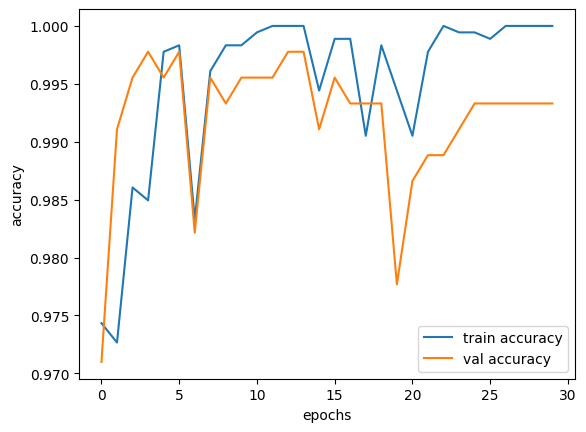

In [ ]:
epochs = list(range(30))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

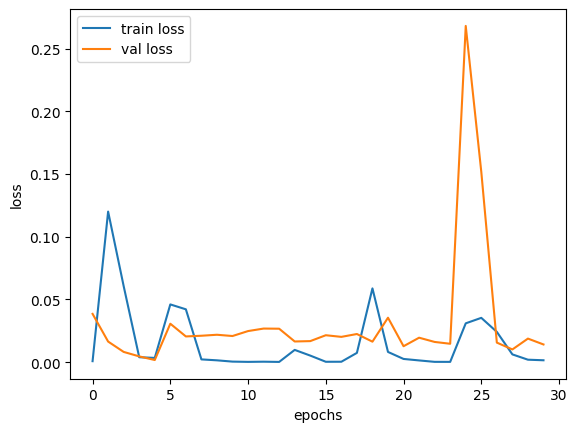

In [ ]:

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test_kf)

class_names= np.argmax(predictions, axis=1)
new_Ytest = np.argmax(y_test_kf, axis=1)

report = classification_report(new_Ytest, class_names)
print(report)
# In[30]:
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test_kf, steps=len(X_test_kf), verbose=0)
y_true=np.argmax(new_Ytest, axis=-1)

cm = confusion_matrix(new_Ytest, class_names)
print(cm)

14/14 [==============================] - 1s 21ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.96      1.00      0.98        52
           2       1.00      1.00      1.00        65
           3       1.00      1.00      1.00        69
           4       1.00      1.00      1.00        52
           5       0.98      0.97      0.98        65
           6       1.00      1.00      1.00        74

    accuracy                           0.99       448
   macro avg       0.99      0.99      0.99       448
weighted avg       0.99      0.99      0.99       448

[[70  0  0  0  0  1  0]
 [ 0 52  0  0  0  0  0]
 [ 0  0 65  0  0  0  0]
 [ 0  0  0 69  0  0  0]
 [ 0  0  0  0 52  0  0]
 [ 0  2  0  0  0 63  0]
 [ 0  0  0  0  0  0 74]]
